<a href="https://colab.research.google.com/github/abadari3/HiddenHelpers/blob/master/hiddenhelpers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install requests

In [0]:
import requests

In [0]:
locationj = dict()
def locationData(stnum, street, city, state):
  link = 'https://api.tomtom.com/search/2/structuredGeocode.json?countryCode=USA'
  link += '&streetNumber=' + stnum
  link += '&streetName=' + street.replace(' ', "%20")
  link += '&municipality=' + city.replace(' ', "%20")
  link += '&countrySubdivision=' + state.replace(' ', "%20")
  link += '&key=WcfmLFVeYLwGWQDY08feLtdQps4g6E2N'
  location = requests.get(link)
  locationj = location.json()
  return locationj

def getres(i, result):
  finalloc = result[i]
  # print(finalloc['address']['freeformAddress'])
  # print(finalloc['address']['countrySecondarySubdivision'] + ", " + finalloc['address']['countryTertiarySubdivision'] + ", " + finalloc['address']['country'])
  lat = finalloc['position']['lat']
  lon = finalloc['position']['lon']
  # print('('+ str(lat) + ', ' + str(lon) + ')')
  return (lat, lon)

print("House Number:", end="\n\t")
stnum = input();
print("Street:", end="\n\t")
street = input();
print("City:", end="\n\t")
city = input()
print("State:", end="\n\t")
state = input()
print()

locationj = locationData(stnum, street, city, state)
getres(0, locationj['results'])

House Number:
	11298
Street:
	Gates Terrace
City:
	Johns Creek
State:
	ga



(34.05667, -84.15639)

In [0]:
def locationData(name):
  link = 'https://api.tomtom.com/search/2/search/'
  link += name.replace(' ', "%20")
  link += '.json?countrySet=USA&topLeft=28.221%2C-82.656&btmRight=27.890%2C-82.240&idxSet=POI'
  link += '&key=WcfmLFVeYLwGWQDY08feLtdQps4g6E2N'
  location = requests.get(link)
  locationj = location.json()
  return locationj

def getInfo(pois):
  try:
    place = pois['results'][0]
    num = pois['results'][0]['address']['streetNumber']
    name = pois['results'][0]['address']['streetName']
    city = pois['results'][0]['address']['municipality']
    state = pois['results'][0]['address']['countrySubdivisionName']
    lat = pois['results'][0]['position']['lat']
    lon = pois['results'][0]['position']['lon']
    return (num, name, city, state, lat, lon)

  except:
    print('error')
    return None


In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1ffeJfNrlue4ZsFjwFGYF0jrgH4Zpj5GI3dC9tc-FyyA/edit#gid=0')
sheet = wb.worksheet('Sheet1')

In [0]:
data = sheet.get_all_values()
for i in range(1, len(data)):
  (num, street, city, state, lat, lon) = getInfo(locationData(data[i][0]))
  sheet.update_cell(i + 1, 2, num)
  sheet.update_cell(i + 1, 3, street)
  sheet.update_cell(i + 1, 4, city)
  sheet.update_cell(i + 1, 5, state)
  sheet.update_cell(i + 1, 6, lat)
  sheet.update_cell(i + 1, 7, lon)
  

Concordia Village of Tampa
University Village
Canterbury Tower Tampa
Bay Gardens Retirement Village
Angels Senio Living at North Tampa
RDT Retirement
Presbyterian Villas of Tampa
JB Capital LLC
Shady Oaks Living Center
Anand Vihar
Inspired Living
Kristiannas Alf Home
Manhattan Place
DCS Retirement Group 
Evas Home Care
E Cs Ybor Manor
Greene Mary
Villas at University Village
Rubys Residential Care Inc
Kings Manor
Buena Vida Care Corp
Brookdale Bayshore
Kings Arms
Casa De Palma House of Palms
Aston Gardens at Tampa Bay
Oak Run Communities
Allegro Hyde Park
The Estate at Hyde Park
Allegro
Discovery Village at Tampa Palms
Wright Brothers
Assissted Living
Hudson Manor Assisted Living
Angels Senior Living at South Tampa
Angels Senior Living at New Tampa
Steiner Communities
Aqua Apartments
University Village Nursing Center
Palm Terrace Assisted Living Facility
Debras Assisted Living Facility


In [0]:
data = sheet.get_all_values()
name = []
lat = []
lon = []
for i in range(1, len(data)):
  name.append(data[i][0])
  lat.append(float(data[i][5]))
  lon.append(float(data[i][6]))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

In [0]:
df = pd.DataFrame({
    'Name': name,
    'Latitude': lat,
    'Longitude': lon})
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

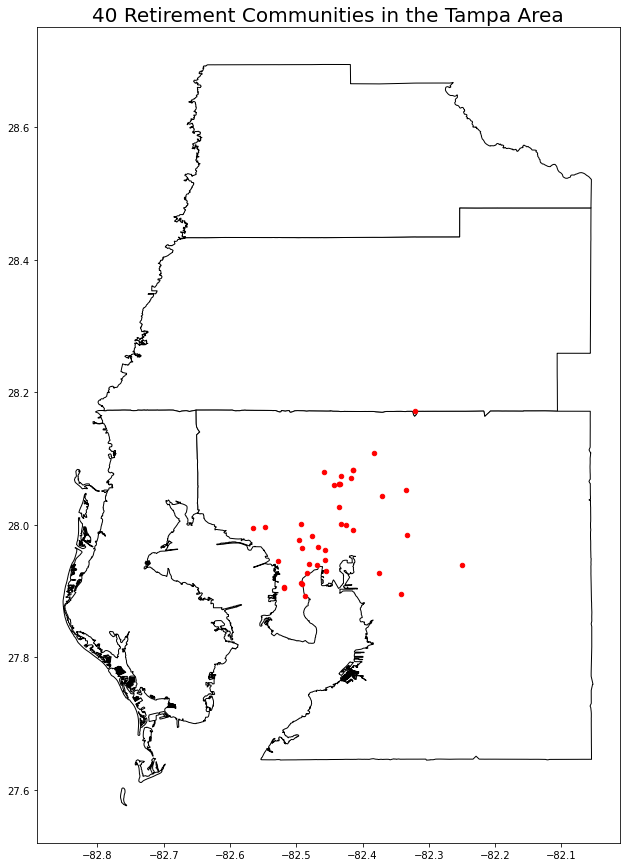

In [342]:
www = geopandas.read_file("tampa_counties.shp")
base = www.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=20)
plt.rcParams["figure.figsize"] = (100, 15)
plt.title("40 Retirement Communities in the Tampa Area")
plt.rcParams["axes.titlesize"] = 20
plt.show()

In [0]:
df2 = pd.DataFrame({
    'Longitude': lon, 
    'Latitude': lat})
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.predict(df2)
centroids = kmeans.cluster_centers_

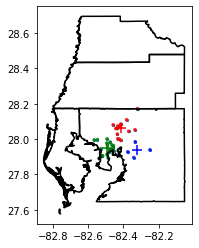

In [0]:
gdf2 = geopandas.GeoDataFrame(df2, geometry=geopandas.points_from_xy(df2.Longitude, df2.Latitude))
www = geopandas.read_file("tampa_counties.shp")
base = www.boundary.plot(color='black')
gdf2.plot(ax=base, marker='o', markersize=5)

colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = [colmap[x+1] for x in labels]
plt.scatter(df2['Longitude'], df2['Latitude'], color=colors, alpha=0.7, s=7)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1], marker='+', s=100)

plt.show()

In [0]:
plt.show()